<a href="https://colab.research.google.com/github/VielF/CodeML/blob/main/ML_code_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Professor - Felipe Viel
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$



# Exercício - Algoritmos de ML

Este é um tutorial de implementação de diversos modelos de Machine Learning, sendo que em boa parte dos exercíciso você irá se a ter em executar e descrever o que conseguiu observar com os experimentos.

Olá mundo

# Preparação / Revisão

- Ler Watt _(Machine Learning Refined)_ cap. 1
- Ler Watt apêndices A, B (de B.3 apenas os exemplos B.1.a e B.2.a) e D
- Ler e praticar os tutoriais:
 - Python (se necessário): https://docs.python.org/3/tutorial
 - NumPy: https://numpy.org/doc/stable/user/quickstart.html
 - Matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
 - Pandas (opcional): https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- Revisar (caso necessário) conceitos básicos de probabilidade e estatística: variáveis aleatórias, distribuição/densidade de probabilidade, histograma, média, variância, correlação

In [ ]:
# Inicie importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Caso você esteja utilizando o Colab (colab.research.google.com) você pode usar as GPUs buscando ganho de desempenho no processamento. Para saber qual GPU irá usar, utilizar o código abaixo. É altamente indicado usar com redes neurais e deep learning.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.neural_network import MLPClassifier

import sys
print('Python version:', sys.version.split(' ')[0])

import tensorflow as tf
print('TensorFlow version:', tf.__version__)

# Find out NVIDIA GPU model (randomly assigned by Colab)
# Deep learning performance: K80 < P4 < T4 < P100
# https://ai-benchmark.com/ranking_deeplearning.html
gpu = !nvidia-smi -L
gpu = gpu[0].split(' (')[0]
if 'failed' in gpu:
  print('GPU: None')
else:
  print(gpu, '\n')
  # GPU information
  !nvidia-smi

Python version: 3.7.13
TensorFlow version: 2.8.0
GPU 0: Tesla T4 

Tue May 24 23:37:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                     

# 1. Manipulando dados

1. Baixe o arquivo `coin_Bitcoin.csv` (**terceiro** arquivo da lista em *Data Sources*) disponível em

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/

e salve-o numa subpasta `data`, i.e., o arquivo estará acessível em `data/bitcoin_price.csv`

2. Carregue o arquivo usando a biblioteca Pandas
3. Trace o gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2017 (365 amostras):
 - usando a função `.plot()` do Pandas
 - convertendo para NumPy e usando Matplotlib

### Dicas

- Siga o exemplo de uso do Pandas em https://github.com/dsevero/dsevero/blob/master/content/posts/pandas/tutorial.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Inicialmente, carrega-se o dado com a funcão "read_csv" da pd (pandas)

In [ ]:
table_data = pd.read_csv("data/coin_Bitcoin.csv")

In [ ]:
table_data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


Com a tabela carregada, fazemos a coluna "Date" ser o index (eixo x) com pd.to_datetime(table_data['Date'])

Ps: o uso da palavra Date é devido ao uso dela como cabeçalho no arquivo CSV

In [ ]:
table_data['Date'] = pd.to_datetime(table_data['Date'])

Agora redmensionamos a tabela para haver somente as colunas "Date" e "Close"

In [ ]:
time_axis = table_data.set_index('Date')['Close']

Com a tabela redimensionada, podemos plotar as amostras usando a função plot() da pandas para o ano de 2017

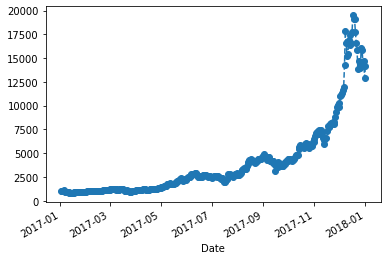

In [ ]:
time_axis['2017'].plot(style='o--');

Como um values e index values de Series da lib pandas (no caso time_axis) é um tipo ndarray da Numpy, como pode ser visto no código a seguir. Sendo assim, pode-se trabalhar com Numpy e matplotlib facilmente.

In [ ]:
type(time_axis.values)

numpy.ndarray

# Análise das implementações - Responda
Agora faça uma análise sobre a questão de analisar os dados e de filtrar informações relevantes que seja úteis para a aplicação.

#### Sua Resposta: 

# Exercício

Com base na implementação anterior, analíse os dados existentes em (escolha 1):

Time Series IOT: https://www.kaggle.com/datasets/vetrirah/ml-iot?select=train_ML_IOT.csv 

Room Occupancy detection data (IoT sensor): https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor

Temperature Readings : IOT Devices: https://www.kaggle.com/datasets/atulanandjha/temperature-readings-iot-devices

A ideia é que você consiga explorar os atributos e olhar a disperção dos dados temporalmente. Explore todos as combinações de atributos (colunas) e veja o comportamento dos dados.

# 2. Análise de dados

Agora, veremos um exemplo de análise de dados usando um conjunto de dados do livro do James _(An Introduction to Statistical Learning)_.

Carregue os dados usando o comando abaixo. Lembre que a variável-alvo (rótulo, variável de saída) é a coluna `sales`.

In [ ]:
df_data_analysis = pd.read_csv('http://www.statlearning.com/s/Advertising.csv', index_col=0)
df_data_analysis.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Iremos:
1. Traçar o histograma de cada variável (coluna), i.e., 4 no total. Para isso, utilize a função `plt.hist()`, com parâmetro `bins=30`.
2. Calcular a matriz de correlação entre as colunas. Dica: utilize a função `pd.DataFrame.corr()`
3. Para cada atributo (variável de entrada), traçar o gráfico do valor-alvo em função do atributo. Utilize um *scatter plot*, i.e., trace apenas os marcadores, não linhas.
4. O que você já pode afirmar sobre os dados a partir dessa análise exploratória?

Após carregar os dados, foi então isolado os valores de cada coluna (representando cada produto), possibilitando a plotagem do histograma.

In [ ]:
tv_values = df_data_analysis['TV'].values
radio_values = df_data_analysis['radio'].values
newspaper_values = df_data_analysis['newspaper'].values
sales_values = df_data_analysis['sales'].values

Após é feita a plotagem de cada histograma (https://pt.wikipedia.org/wiki/Histograma), começando pelo da TV, seguido pelo radio, newspaper e Sales:

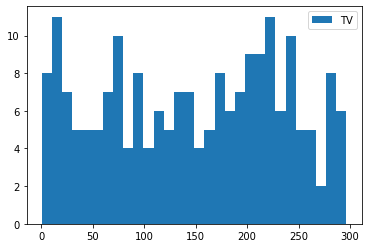

In [ ]:
plt.hist(tv_values,bins=30,label = 'TV')
plt.legend(loc='upper right')
plt.show()

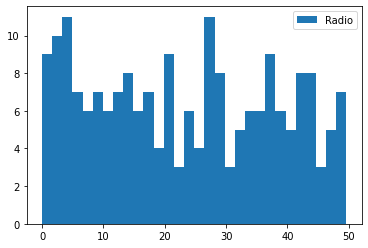

In [ ]:
plt.hist(radio_values,bins=30,label = 'Radio')
plt.legend(loc='upper right')
plt.show()

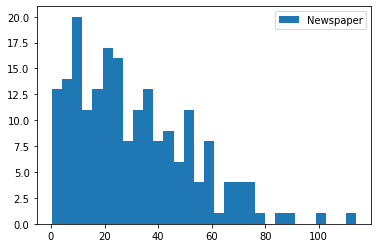

In [ ]:
plt.hist(newspaper_values,bins=30,label = 'Newspaper')
plt.legend(loc='upper right')
plt.show()

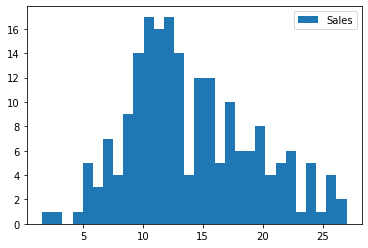

In [ ]:
plt.hist(sales_values,bins=30,label = 'Sales')
plt.legend(loc='upper right')
plt.show()

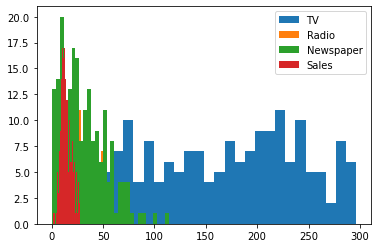

In [ ]:
plt.hist(tv_values,bins=30,label = 'TV')
plt.hist(radio_values,bins=30,label = 'Radio')
plt.hist(newspaper_values,bins=30,label = 'Newspaper')
plt.hist(sales_values,bins=30,label = 'Sales')
plt.legend(loc='upper right')
plt.show()

Agora é feito a correlação entre as informações da tabela. Posteriormente é plotado com os marcadores a relação entre a midia e as vendas.

In [ ]:
df_data_analysis

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
df_data_analysis.corr(method='spearman') #pearson kendall spearman

,TV,radio,newspaper,sales
TV,1.000000,0.056123,0.050840,0.800614
radio,0.056123,1.000000,0.316979,0.554304
newspaper,0.050840,0.316979,1.000000,0.194922
sales,0.800614,0.554304,0.194922,1.000000


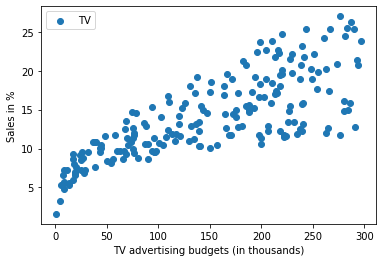

In [ ]:
plt.scatter(tv_values, sales_values,label = 'TV')
plt.legend(loc='upper left')
plt.xlabel('TV advertising budgets (in thousands)');
plt.ylabel('Sales in %');
plt.show()

Agora plotaremos a disperção de dados do Rádio e Jornal (Newspaper).

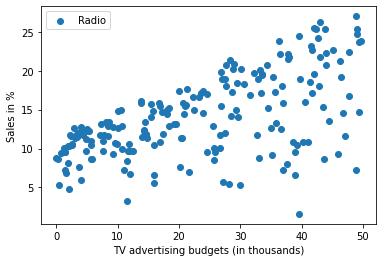

In [ ]:
#implemente aqui a plotagem do radio
plt.scatter(radio_values, sales_values,label = 'Radio')
plt.legend(loc='upper left')
plt.xlabel('TV advertising budgets (in thousands)');
plt.ylabel('Sales in %');
plt.show()


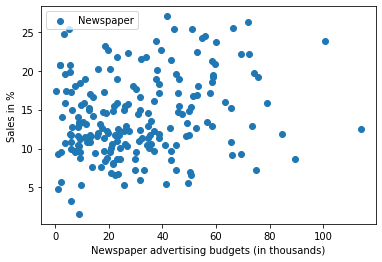

In [ ]:
#implemente aqui a plotagem do jornal
plt.scatter(newspaper_values, sales_values,label = 'Newspaper')
plt.legend(loc='upper left')
plt.xlabel('Newspaper advertising budgets (in thousands)');
plt.ylabel('Sales in %');
plt.show()


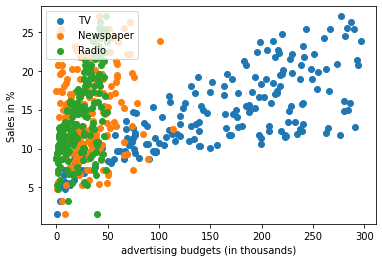

In [ ]:
#Agora plote as três dispesões em conjunto
plt.scatter(tv_values, sales_values,label = 'TV')
plt.scatter(newspaper_values, sales_values,label = 'Newspaper')
plt.scatter(radio_values, sales_values,label = 'Radio')
plt.legend(loc='upper left')
plt.xlabel('advertising budgets (in thousands)');
plt.ylabel('Sales in %');
plt.show()

# Análise dos dados

Escreva uma análise dos dados, observando a relação gasto com publicidade e vendas obtidas. Essa análise é importante para conseguir relacionar o modelo de Regressão.

## Sua Resposta:

# Continuando a modelagem com os dados
No código seguinte será feito as seguintes manipulações:

5. Extrair a matriz de projeto $\bX$ e vetor de rótulos $\by$. Dica: utilize a função do pandas `.to_numpy()`
1. Separar o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `train_test_split()` da biblioteca scikit-learn.

Nas duas primeira linhas são selecionados os dados em arrays diferentes. A primeira linha é responsável por copiar, direntamente como um ndarray, a matriz de projeto. Na segunda linha, é copiado o array de rótulos.

In [ ]:
#5
X = df_data_analysis[['TV','radio','newspaper']].values
y = df_data_analysis['sales'].values
print(X.shape)
print(y.shape)

(200, 3)
(200,)


Para usar a função 'train_test_split()' é passado, como parâmetros, os dois arrays copiados anteriomente, a quantidade (em percentual) de valores que serão usado para testar e um valor para geração de números aleatório (controle da geração), sendo os números inteiros 42 e 0 os mais populares (segundo página da lib).

In [ ]:
#6
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,random_state=42) #42 43

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


Posteriormente, fazemos:

7. Treinar um modelo de regressão linear ([O que é Regressão Linear](https://pt.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-trend-lines/a/linear-regression-review#:~:text=Regress%C3%A3o%20linear%20%C3%A9%20o%20processo,em%20um%20diagrama%20de%20dispers%C3%A3o.)) sobre o **conjunto de treinamento**. Para isso, utilize a função `sklearn.linear_model.LinearRegression()` da biblioteca sklearn. 
7. Calcular a raiz do erro quadrático médio (RMSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste. Para isso, utilize a função `sklearn.metrics.mean_squared_error()` do sklearn.
8. Encontrar alguma forma de visualizar o modelo treinado ou suas predições.

In [ ]:
#7 e 8
#import das bibliotecas de modelo para Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#criação do modelo
model = LinearRegression()
model.fit(X_train, y_train) #treinamento do modelo
#print(model.coef_) #usado apenas para validar 
model_test_train = model.predict(X_train) #predição com o modelo treinado usando o conjunto de treino
model_y_pred = model.predict(X_test) #predição com o modelo treinado usando o conjunto de teste
print(model.score(X_test, y_test)) #faz uma predição e ao mesmo tempo test pra medir a acurácia
print('Train RMSE:', np.sqrt(mean_squared_error(y_train,model_test_train)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test,model_y_pred)))

0.899438024100912
Train RMSE: 1.644727765644337
Test RMSE: 1.7815996615334502


Abaixo, é apresentado (graficamente) a predição com o modelo treinado e com os parâmetros de teste para cada tipo de midia.

# Atividade 

Baseado na plotagem dos dados com o modelo treinado, você deve plotar também os dados da radio e do jornal (newspaper).

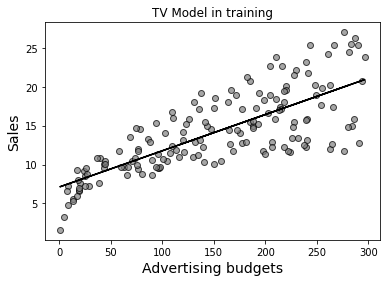

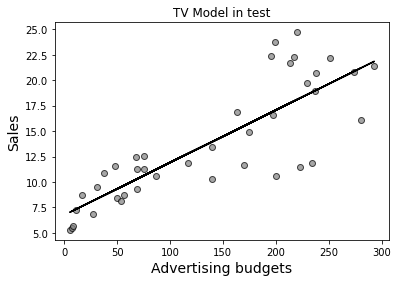

In [ ]:
#9
#função criada para criar um modelo e já realizar a plotagem
def show_model(X_plot,y_plot, type_test): 
    ols = LinearRegression()
    model_plot = ols.fit(X_plot, y_plot)
    response_plot = model_plot.predict(X_plot)

    plt.plot(X_plot, response_plot, color='k', label='Regression model')
    plt.scatter(X_plot, y_plot, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
    plt.ylabel('Sales', fontsize=14)
    plt.xlabel('Advertising budgets', fontsize=14)
    plt.title(type_test)
    plt.show()

#função do pandas que pega somente os valores da coluna sales
y_plot = df_data_analysis['sales'].values

#função do pandas que pega somente os valores da coluna TV e passa pra função acima pra treinamento e plotagem
#é usado a função train_test_split para dividir o conjunto de dados do dataset a fim de realizar avaliação do modelo
X_plot_TV = df_data_analysis['TV'].values.reshape(-1,1) # o reshape é para transfora em em um vveto 1D de N amostras
X_plot_TV_train, X_plot_TV_test, y_plot_TV_train, y_plot_TV_test = train_test_split(X_plot_TV, y_plot, test_size=0.2, train_size=0.8,random_state=42)
show_model(X_plot_TV_train,y_plot_TV_train, "TV Model in training")
show_model(X_plot_TV_test,y_plot_TV_test, "TV Model in test")    


# Análise dos Resultados

Agora você deve analisar o que você conseguiu perseber com esse modelo de Machine Learning, no caso a Regressão, visando prever valores para vendas baseado em investimento em mídias.

## Sua Resposta:

### Dicas

- Funções úteis
```python
pd.hist()
pd.DataFrame.corr()
pd.DataFrame.to_numpy()
sklearn.model_selection.train_test_split()
sklearn.linear_model.LinearRegression()
sklearn.metrics.mean_squared_error()
np.sqrt()
```
- Caso deseje uma referência, consulte o tutorial disponível em:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155. Note, porém, que não é necessário usar as funções da biblioteca `seaborn`.

# Exercício

Com base no código anterior, onde exploraramos um algoritmo simples, o Regressão Linear, agora você deve fazer essa exploração no dataset:

Room Occupancy detection data (IoT sensor): https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor

Veja qual atributo (ou atributos) representa melhor o comportamento de identificar a ocupação de um comodo. 

Após a análise dos dados e implementação do classificador, responda:

  - Todos os atributos são úteis?
  - Algum dos atributos mais contamina do que ajuda na regressão?
  - 1 atributos apenas é suficiente para fazer essa análise?  Usando uma métrica adequada, você consegue dizer que uma várivel é suficiente para o modelo? Pense que isso ajuda o algoritmo a processar "mais rápido".

# 3. Regressão Logística

Agora veremos um forma de aplicar o modelo de Regressão Logística ([O que é Regressão Logística](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)), que é um modelo que melhora a adaptação a dados que não são linearmente separáveis e permite fazer uma predição (classificação) dos mesmos. 

As funções abaixo são usadas para manipular e plotar dados. Análise as funções (consulte o professor caso não entenda algum comando).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn as sl
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
print("sklearn version: ", sl.__version__)
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def gen_data(n_samples=20, n_classes=2, overlap=0, x_scale=[0,1], random_state=None):
    '''Generate 1-D classification dataset'''
    assert overlap <= 1
    rng = np.random.RandomState(random_state)
    X = np.zeros((n_samples,1))
    y = np.zeros(n_samples)
    for i in range(n_samples):
        k = i % n_classes
        X[i,0] = (k*(1-overlap) + rng.rand())/((n_classes-1)*(1-overlap) + 1)
        y[i] = k
    X = x_scale[0] + (x_scale[1]-x_scale[0])*X
    return X, y

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0], np.zeros(np.sum(y==classes[i])), colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0], X[y==classes[i],1], colors[i])
    return

def plot_boundary(model, X, colors=['b','r','g','m','c','y'], N=400, gap=1e-9):
    ''' Plot boundary for a 1-D or 2-D classifier '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        X = np.c_[xx1.reshape(-1)]
    else:
        X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    y_pred = model.predict(X)
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    y_pred = enc.fit_transform(y_pred)
    assert len(enc.classes_) <= len(colors)
    levels = np.arange(len(enc.classes_)+1)-0.5
    y_pred = y_pred.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_pred, levels, colors=colors, alpha=0.25)
    plt.contour(xx1, xx2, y_pred, levels, colors='k', linewidths=1)
    return

def plot_errors(model, X, y):
    ''' Draws a square around each incorrect prediction '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    dim = X.shape[1]
    assert 0 < dim <= 2
    err = model.predict(X) != y
    vert = np.zeros(np.sum(err))
    if dim == 2:
        vert = X[err,1]
    plt.plot(X[err,0], vert, 'ks', mfc='none', markersize=10)
    return

sklearn version:  1.0.2


Aqui geramos o que chamamos de dados Não separáveis linearmente, sendo que se passarmaos uma linha reta (sem curva) não conserguimos separar os dados. Sendo assim, precisamos usar um modelo mais adequado.

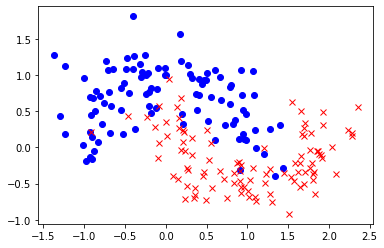

In [ ]:
from sklearn.datasets import make_moons

np.random.seed(2019*2)
X, y = make_moons(n_samples=200, noise=0.25)
X_val, y_val = make_moons(n_samples=10000, noise=0.25)
X_test, y_test = make_moons(n_samples=10000, noise=0.25)
plot_data(X, y)

## Desenvolvimento do modelo

Agora, faremos os seguintes passos:

1. Desenvolver um bom classificador de regressão logística, da forma que achar o mais adequado.
1. Justificar a escolha. Em particular, tentaremos justificar que o modelo não está sofrendo nem de underfitting nem de overfitting.

Observe o comando make_pipeline ([O que é make_pipeline v1](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) ou [O que é make_pipeline v2](https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b)) e o PolynomialFeatures() ([O que é PolynomialFeatures](https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/). A leitura de comandos e como eles funcionam é uma tarefa obrigatória para quem usa ciência da dados e ML.

Training accuracy: 0.92 %
Validation accuracy: 0.93 %
Test accuracy: 0.93 %


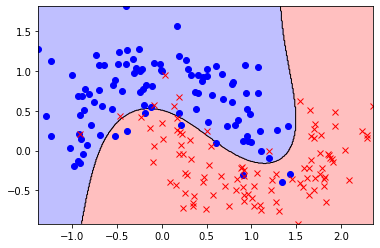

In [ ]:
#usamos o make_pipeline para juntar processos que adaptam e estruturam os dados juntantomente com a criação dos modelos.
model_log_regr_reg_4 = make_pipeline(PolynomialFeatures(3),LogisticRegression(penalty='l2',max_iter=100000000, C=2e1))
model_log_regr_reg_4.fit(X, y) #aqui treinamos o modelo
y_predict_4 = model_log_regr_reg_4.predict(X) #aqui fazemos a predição, que é quando o modelo irá realmente "classificar"

#aqui medimos a qualidade do modelo por um métrica de avaliação - no caso a acurácia
print("Training accuracy: %.2f" % model_log_regr_reg_4.score(X, y),"%")
print("Validation accuracy: %.2f" % model_log_regr_reg_4.score(X_val, y_val),"%")
print("Test accuracy: %.2f" % model_log_regr_reg_4.score(X_test, y_test),"%")
plot_errors(model_log_regr_reg_4, X, y_predict_4)
plot_boundary(model_log_regr_reg_4, X) #para plotar os dados
plot_data(X, y)

Aqui foram usados uma junção em formato de pipeline de dados, onde foca-se em observar os dados e tentar adequar o modelo para poder realizar divisão dos dados em dois rótulos (classificação), sendo que um dos teste foi aplicando diferentes graus de funções polinomiais, onde um grau polinomial maior permite uma maior adequação aos dados. O uso de regularaização l2 também permite melhor a taxa de acerto tanto para treinamento quanto para validação.

# Análise do Modelo

Agora faça uma análise do modelo, comparando principalmente com os modelos de Regressão Logística. O que você considera melhor nesse modelo que no de regressão logística? Também explore os camosndos e funções usadas, bem como descreva o que você entendeu sobre regularização.

## Sua Resposta:

# Exercício

Agora, usando o código acima e os conhecimentos adiquiridos nos exercícios anteriores, vamos fazer classificação de dados. Para isso, vamos usar o dataset: 

Maternal Health Risk Data: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data

A ideia do dataset é prever o risco de gravidez usando um sistema IoT para monitoramento de saúde. Faça uma análise dos dados. 

Uma dica é colocar os termos `low risk`, `mid risk` e `high risk` como valores numéricos 1, 2 e 3, respectivamente. Para isso você pode carregar o arquivo csv (igual fez nos outros exercícios) e substituir no python mesmo (vamos lá, automatize o processo).

# 4. SVM

Neste exercício você irá construir classificadores usando máquinas de vetores de suporte (SVM - [Link para explicação](https://https://minerandodados.com.br/famoso-svm/)), tando em sua versão linear quanto na versão baseada em kernels. Também serão abordadas técnicas de validação cruzada para avaliação de desempenho e busca de hiperparâmetros.

In [ ]:
# aqui são importadas as bibliotecas e declaradas as funções de plotagem e criação de dados
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
!pip install wget
import wget
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],np.zeros(np.sum(y==classes[i])),colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],X[y==classes[i],1],colors[i])
    return

def plot_svm(model, X, heatmap=False, circles=None, N=100, gap=1e-9):
    ''' Plot decision regions for a 1-D or 2-D binary SVM classifier '''
    assert len(X.shape) == 2
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        XX = np.c_[xx1.reshape(-1)]
    else:
        XX = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = model.decision_function(XX)
    assert len(z.shape) == 1
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    if heatmap:
        a = np.max(np.abs(z))*2
        plt.contourf(xx1,xx2,z,100,cmap=plt.cm.bwr,vmin=-a,vmax=a)
        if circles == None:
            circles = False
    else:
        plt.contourf(xx1,xx2,z,cmap=plt.cm.bwr,vmin=-3,vmax=3,levels=[-1,0,1])
        if circles == None:
            circles = True
    if circles:
        S = X[model.support_]
        if dim == 1:
            S = np.c_[S, np.zeros(S.shape[0])]
        plt.plot(*S.T,'go',mfc='none',ms=12)
    return

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=676322c60f7a3079f2a39913d06025cb7a54372784ee20da65869c1891c6ab14
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


O próximo conjunto de dados pode ser carregado pelo comando abaixo. Note que este é o mesmo conjunto utilizado em Regressão Logística, exceto que o conjunto de validação agora tem o mesmo tamanho do conjunto de treinamento. (Para fins didáticos, o conjunto de teste continua extremamente grande.)

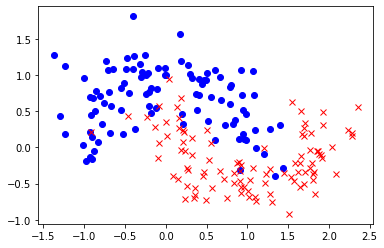

In [ ]:
from sklearn.datasets import make_moons

#criação do dataset sintético
np.random.seed(2019*2)
X_train, y_train = make_moons(n_samples=200, noise=0.25)
X_val, y_val = make_moons(n_samples=200, noise=0.25)
X_test, y_test = make_moons(n_samples=10000, noise=0.25)
plot_data(X_train, y_train)

## Busca de hiperparâmetros: Grid search + Validação hold-out

Aqui utilizaremos um classificador SVM com kernel RBF. Iremos determinar os melhores valores dos hiperparâmetros de acordo com o desempenho no conjunto de validação. Em outras palavras, iremos variar parâmentros do modelo, o $C$ e $\gamma$, sempre treinando o modelo no conjunto de treinamento e medindo o desempenho no conjunto de validação, até encontrar os valores que maximizam a acurácia de validação.

Para isso, definimos uma lista de valores de $C$ (digamos, `list_C`) e uma lista de valores de $\gamma$ (digamos, `list_gamma`), e variar $(C,\gamma)$ dentro da grade `list_C` x `list_gamma` (este método é conhecido como [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)), o que a princípio poderia ser implementado com dois laços `for`. No entanto, para facilitar, usaremos a função `grid_search` fornecida abaixo, a qual internamente utiliza a função `GridSearchCV` da biblioteca `sklearn`, com a opção `cv=PredefinedSplit()`.

Faremos as seguintes tarefas:

1. Utilizar a função `grid_search` fornecida abaixo para encontrar os melhores valores de $C$ e $\gamma$.
1. Em seguida, para os valores encontrados, traçar o gráfico da região de decisão (com o conjunto de treinamento) e determine a acurácia nos conjuntos de treinamento, validação e teste.

#### Dicas

- Para ambos $C$ e $\gamma$, é recomendável utilizar valores que seguem uma progressão geométrica, i.e., regularmente espaçados no expoente. 
- A função `np.logspace()` pode ser útil.

In [ ]:
# aqui são importadas funções usadas para achar dados
from sklearn.model_selection import GridSearchCV, PredefinedSplit

# essa função ajuda na procura pelos melhores parâmentros do modelo
def grid_search(model, param_grid, X_train, y_train, X_val, y_val):
    val_index = [-1]*len(X_train) + [0]*len(X_val)
    gs = GridSearchCV(model, param_grid, refit=False, cv=PredefinedSplit(val_index))
    gs.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])
    return gs.best_params_

In [ ]:
#definimos um intervalo de valores a serem testados, buscando encontrar o melhor
list_C = list_gamma =  np.linspace(0.001, 100,100)

In [ ]:
# criamos a estrutura de dados para a pesquisa de parâmetros
param_grid = {'C':list_C, 'gamma':list_gamma} # not a very good choice
# This will try the following sets of parameters:
# [{'C': 0.001, 'gamma': 0.001},
#  {'C': 0.001, 'gamma': 1000},
#  {'C': 0.003, 'gamma': 0.001},
#  {'C': 0.003, 'gamma': 1000},
#  {'C': 0.01, 'gamma': 0.001},
#  {'C': 0.01, 'gamma': 1000}]

# Agora fazemos a busca pelo melhor (busca otimizada)
best_params = grid_search(SVC(kernel='rbf'), param_grid, X_train, y_train, X_val, y_val)
print(best_params)

# valores encontrados
C, gamma = best_params['C'], best_params['gamma']

{'C': 2.021181818181818, 'gamma': 8.081727272727273}


In [ ]:
C, gamma = 2.021181818181818, 8.081727272727273

Train accuracy: 93.5%
Val accuracy: 96.5%
Test accuracy: 93.0%


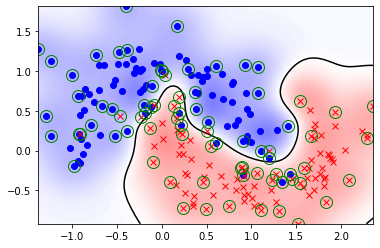

In [ ]:
# Criamos o modelo com kernel RBF, um dos kernels mais famosos
model = SVC(C=C, kernel='rbf', gamma = gamma)
model.fit(X_train, y_train) #treinamos o modelo

# Aqui testamos os conjuntos de dados para o modelo treinamento, avaliando a acurácia 
print('Train accuracy: {:.1%}'.format(model.score(X_train, y_train)))   
print('Val accuracy: {:.1%}'.format(model.score(X_val, y_val)))
print('Test accuracy: {:.1%}'.format(model.score(X_test, y_test)))

# Plotamos para olhar visulamente como o modelo se adaptou ao conjuntos de dados
plot_data(X_train, y_train)
plot_svm(model,X_train,heatmap=True, circles=True)

## Busca de hiperparâmetros: Grid search + Validação cruzada $k$-fold

Agora, suponha que você não possui ou não deseja separar um conjunto de validação (*hold-out*) como feito acima. Isto é, assuma que `X_val` e `y_val` não existem. Ainda assim é possível obter uma boa estimativa de desempenho---sem usar o conjunto de teste---e utilizá-la para a escolha de hiperparâmetros, utilizando validação cruzada $k$-fold (conforme feito no item 2.7). Esta estimativa pode ser combinada, por exemplo, com uma busca em grade para determinação de hiperparâmetros; em outras palavras, para cada configuração de hiperparâmetros da grade fornecida, deve-se realizar uma validação cruzada $k$-fold para estimativa de desempenho daquela configuração.

A princípio, isto poderia ser implementado através de laços `for` (para busca em grade) combinados com a função `cross_val_score()` para estimativa de desempenho. No entanto, para facilitar, vamos diretamente utilizar a biblioteca `sklearn`, a qual já possui uma implementação eficiente da busca em grade com validação cruzada, mais precisamente a função `sklearn.model_selection.GridSearchCV()`. Essa abordagem é, na verdade, a forma mais comum de uso desta função (ao contrário da abordagem do item anterior).

Agora faremos:

3. Realizar uma busca de hiperparâmetros através de *grid search* com validação cruzada 5-fold. Lembre-se que você vai usar somente o conjunto de treinamento.
1. Para o melhor classificador encontrado, traçar o gráfico da região de decisão (com o conjunto de treinamento) e determine a acurácia nos conjuntos de treinamento e teste (lembre que não existe mais conjunto de validação separado).
1. Comente sobre os resultados observados.

#### Dicas

- Para utilizar a função `GridSearchCV` você precisará definir o argumento `param_grid`. Por exemplo:

```
param_grid = {'C':[0.001, 0.003, 0.01], 'gamma':[0.001, 1000]}
```

- Estude a documentação da função `GridSearchCV`. Em particular, as propriedades `.best_estimator_` e `.cv_results_` são interessantes e possivelmente úteis.
- A opção `refit=True` permite utilizar o próprio objeto `gs = GridSearchCV()` como classificador, com funções `predict`, `score`, etc. No entanto, isso pode causar confusão. Inicialmente, é recomendável usar a função apenas para encontrar os melhores hiperparâmetros e então treinar separamente o modelo no conjunto de treinamento.

In [ ]:
del X_val, y_val # deletamos o conjunto de validação pois não precisamos mais

In [ ]:
list_C = list_gamma =  np.linspace(0.1, 10,100) # criamos um intervalo de valores que serão testados
param_grid = {'C':list_C, 'gamma':list_gamma}  # aqui criamos a estrutura para procurar os dados
gs = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=None) # fazemos a função achar os melhores parâmetros do modelo

gs.fit(X_train, y_train) # testamos para ver se realmente é bom
print(gs.best_params_) # printamos os parâmentros encontrados

#aqui só usamos váriaveis intermediárias para deixar mais claro o nome dos parâmetros encontrados
C, gamma = gs.best_params_['C'], gs.best_params_['gamma']



{'C': 0.1, 'gamma': 4.0}


In [ ]:
C= 0.1
gamma = 4.0

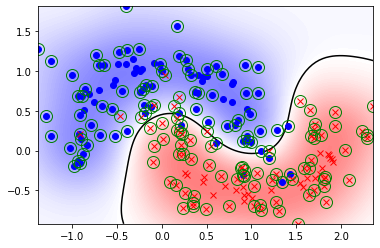

In [ ]:
#print(gs.best_estimator_) # aqui avaliamos os melhores parâmentros para criar o nosso modelo de aprendizado de máquina
#print('Train accuracy: {:.1%}'.format(gs.score(X_train, y_train)))  
#print('Test accuracy: {:.1%}'.format(gs.score(X_test, y_test)))

#aqui criamos o modelo, treinamos e testamos os resultados
model = SVC(C=C, kernel='rbf', gamma = gamma)
model.fit(X_train, y_train)
plot_data(X_train, y_train)
plot_svm(model,X_train,heatmap=True, circles=True)

Para os hiperparâmetros encontrados via grid-search, observa-se uma melhora na acurácia do vetor de teste e uma piora no vetor de treinamento (talvez motivada pela troca do intervalo das listas de hiperparâmetros usadas). Apesar disso, os resultados são satisfatório para o conjunto de dados utilizado.

# Análise dos Resultados

Agora você irá fazer uma análise do algoritmo SVM (muito popular em classificação binária). Compare-o com os modelos anteriores de Regressão e descreva o que você entendeu sobre ele em pesquisas feitas no Google.

## Sua Resposta:

# Exercício

Aplique o mesmo dataset de regressão logística (o do exercício) com o classificador SVM. Caso queira, pode aplicar outro dataset do kaggle sobre IoT também.

A classificação foi melhor (baseando-se nas métricas adequadas)?

# 5. Redes Neurais

Agora iremos explorar como usar uma arquitetura básica de Rede Neural ([O que é Rede Neural](https://www.tecmundo.com.br/programacao/2754-o-que-sao-redes-neurais-.htm)) com o sklearn. Uma Rede neural se caracteria, basicamente, como tendo uma única camada oculta. Para os experimentos que você reproduzirá e análisará, é usado a função MPLClassifier().


Iniciamente, criamos uma dataset sintético.

(300, 2) (300,)
(100, 2) (100,)


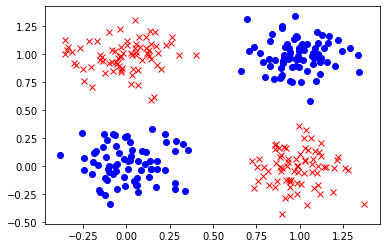

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#criamos os dados sitntéticos
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/4, random_state=0) #dividimos para não gerar contaminação

plot_data(X_train,y_train) # plotamos os dados 

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

Em seguida, utilize uma rede neural de 1 camada (nenhuma camada oculta) com ativação de saída logística e sem regularização, sempre com `solver='lbfgs'`. Note que o parâmetro `activation` refere-se à ativação das camadas ocultas e portanto é irrelevante neste caso particular, podendo ser escolhido como `'identity'`, o que corresponde a uma ativação linear. Note também que `alpha` é o parâmetro de regularização, equivalente a `1/C`. 

Train accuracy: 48.3%
  Val accuracy: 45.0%


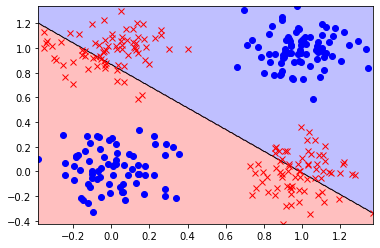

In [ ]:
from sklearn.neural_network import MLPClassifier # importamos o classificador

# criamos o modelo com uma camada e a quantidade default de neurônios
model = MLPClassifier(hidden_layer_sizes=[], activation='identity', solver='lbfgs', alpha=0) 
model.fit(X_train, y_train) # aqui treinamos a noss RN

# plotagem dos dados
plot_data(X_train, y_train)
plot_boundary(model, X_train)

# medimos acurâcia
print('Train accuracy: {:.1%}'.format(model.score(X_train, y_train)))
print('  Val accuracy: {:.1%}'.format(model.score(X_val, y_val)))

Agora iremos variar a quantidade de unidades de ativação (neurônio) de uma única camada oculta. Observe que obtemos uma acurácia melhor com essa arquitetura.

Train accuracy: 75.0%
  Val accuracy: 75.0%


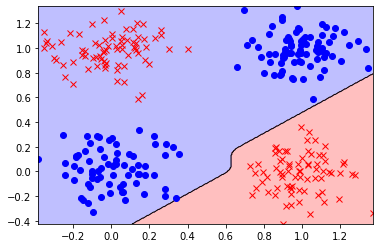

In [ ]:
# criamos o modelo com uma camada e a quantidade de 2 neurônios
model = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', alpha=0)
model.fit(X_train, y_train) #treinamos o modelo

# plotamos os dados usando as funções definidas anteriormente
plot_data(X_train, y_train)
plot_boundary(model, X_train)

# printamos a acurâcia do modelo
print('Train accuracy: {:.1%}'.format(model.score(X_train, y_train)))
print('  Val accuracy: {:.1%}'.format(model.score(X_val, y_val)))

## Atividade - Desenvolva

Como tarefa, você deve implementar a mesma aquitetura feita acima e explorar uma maior quantidad de neurônios tentando melhorar a acurácia do modelo. Pode mexer a vontade na quanidade nos neurônios. 

Train accuracy: 100.0%
  Val accuracy: 99.0%


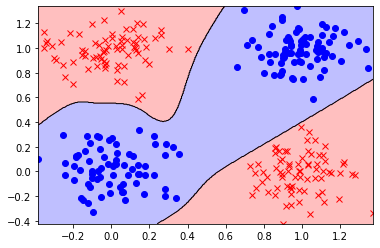

In [ ]:
# criamos o modelo com uma camada e a quantidade de 20 neurônios
model = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', solver='lbfgs', alpha=0)
model.fit(X_train, y_train) #treinamos o modelo

# plotamos os dados usando as funções definidas anteriormente
plot_data(X_train, y_train)
plot_boundary(model, X_train)

# printamos a acurâcia do modelo
print('Train accuracy: {:.1%}'.format(model.score(X_train, y_train)))
print('  Val accuracy: {:.1%}'.format(model.score(X_val, y_val)))

# Análise dos Resultados

Agora análise o desenpenho da Rede Neural variando a quantidade de unidades de ativação. O que você consegue observar? Você acha que os parâmetros usados pelo modelo são adequados?

## Sua Resposta:

# Exercício

Aplique MLP com o seguinte dataset:

Human Stress Detection in and through Sleep: https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv

Faça a análise dos dados e aplique MLP para classificação.

# Redes Profundas (Deep Learning)

Basicamente são redes neurais com mais de uma camada oculta ([O que é Deep Learning](https://www.cetax.com.br/blog/o-que-e-deep-learning/)). A partir de agora, desenvolveremos os modelos de aprendizado profundo utilizando o Keras/TensorFlow, o qual possui muito mais recursos do que o sklearn e é mais otimizado para desempenho (use a GPU do Colab aqui).



Inicialmente fazemos a criação de um dataset sintético.

In [ ]:
# importamos as bibliotecas
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# criamos o dataset
X_train, y_train = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y_train = (y_train >= 2).astype(int)

#dividimos o dataset entre treinamento e validação (usar validação ajuda a não vazar dados de teste durante o treinamento)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(300, 2) (300,)
(100, 2) (100,)


Agora criamos uma arquitetura básica.

In [ ]:
# importamos as bibliotecas
from tensorflow import keras
from keras import layers

# criamos o modelo sequêncial com duas camadas (você pode adicionar mais se quiser)
model = keras.Sequential()
model.add(layers.Dense(150, activation="relu", name="layer1"))
model.add(layers.Dense(150, activation="relu", name="layer2"))
model.add(layers.Dense(150, activation="relu", name="layer3"))
model.add(layers.Dense(150, activation="relu", name="layer4"))

#aqui compilamos com otimizador Adam e avaliamos ao treinamento pela acurácia
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),      
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100) #treinamento do modelo (pode demorar sem GPU)

Epoch 1/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8574 - accuracy: 0.6700
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6815 - accuracy: 0.6700
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7067
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.9033
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.9467
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4884 - accuracy: 0.9800
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.9900
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.9967
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4181 - accuracy: 0.9967
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3929 - accuracy: 0.9967
Epoch 11/

Foi feito o treinamento do modelo usando a função fit(). Além disso foi acompanhado a acurácia do modelo durante o treinamento. Posteriormente, é avaliado a acurácia do conjunto de validação.

In [ ]:
# aqui avalimos o modelo pela acurácia - avaliamos o conjunto de validação
val_loss, val_acc = model.evaluate(X_val,  y_val, verbose=2)
print('\nTest accuracy:', val_acc)

4/4 - 0s - loss: 4.1211e-04 - accuracy: 1.0000 - 143ms/epoch - 36ms/step

Test accuracy: 1.0


## Análise dos Resultados

Você acha que aumentar a quantidad de camadas ou de unidades de ativação irá surtir efeito? Ou diminuir a quantidade de camadas, consegue-se obter a mesma acurácia? Fique livre em adicionar o dimunuir camadas e unidades de ativação para ver os feitos do modelo com o conjunto de dados.

## Sua resposta:

# Análise dos Resultados

O que você consegue entender da camada FLatten? Ela é importante para esse tipo de dado (imagens)? Quais as principais diferenças da arquitetura usada com os dados sintéticos e usada com o MNIST você notou (pode fazer uma pesquisa no Google)?

## Sua Resposta:

# Exercício

Aplique o mesmo dataset da MLP com Deep Learning e veja se o uso de mais camada trás resultados. Análise se os dados usados são adequados. Essas análise são importantes para o uso do algoritmo no dia-a-dia.

# Redes Neurais Convolucionais 

Agora trabalharemos com um tipo de rede neural muito útil para classificar imagens e áudio, as redes neurais convolucionais ([O que é CNN](https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184)).

Inicialmente, importamos o dataset. O conjunto de dados é o conjunto de dígitos manuscritos MNIST, o qual possui 70000 amostras, sendo 10000 amostras de teste. Este é um conjunto clássico e -- embora não seja mais recomendado para avaliação do estado da arte -- ainda vastamente utilizado para experimentação e aprendizado. O conjunto pode ser facilmente carregado pelos comandos abaixo.

In [ ]:
# Novamente importamos o MNIST
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() #carregamos o dataset

# printamos o tamanho do dataset
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Observe a diferença na notação convencional quando usamos o Keras (ou qualquer outro framework de aprendizado profundo): x (minúsculo) ao invés de X (maiúsculo). Isto ocorre porque o Keras nos permite trabalhar diretamente com os dados em seu formato original, neste caso, como um tensor 3D. Portanto, não é necessário redimensionar (reshape) os dados antes de aplicar o modelo, assim como perde o sentido usar uma notação especial para denotar uma matriz (tensor 2D).

Caso seja necessário redimensionar os dados em algum estágio do modelo, isso pode ser feito internamente com camadas do Keras. Em particular, para redimensionar para o formato convencional de tensor 2D (n_samples, n_features), pode ser usada a camada Flatten. Isto é sempre necessário antes de aplicar uma camada Dense, a qual só opera na última dimensão. No nosso caso, as duas dimensões (28,28) serão "achatadas" em uma única de (784,):

Agora é feito uma separação dos dados.

In [ ]:
# aqui printamos criamos o conjunto de validação usando somente 5000 amostras do conjunto de treinamento
x_val = x_train[55000:]
y_val = y_train[55000:]

x_train = x_train[:55000]
y_train = y_train[:55000]

#printamos o tamanho dos conjuntos de treinamento, validação e teste
print("Train shapes: ", x_train.shape)
print("Val shapes: ",x_val.shape)
print("Test shapes: ",x_test.shape)

Train shapes:  (55000, 28, 28)
Val shapes:  (5000, 28, 28)
Test shapes:  (10000, 28, 28)


In [ ]:
# importamos as bibliotecas necessárias
from tensorflow import keras
from tensorflow.keras import layers

# indicamos o tamanho das imagens (com 28x28 e uma banda do RGB)
dim_x, dim_y, dim_z = 28,28,1
size_train = x_train[0] # pegamos o tamanho do conjunto de treinamento

# função que permite criar e retornar um modelo de aprendizado de máquina criado
def make_model():
    model = keras.Sequential(
      [
       keras.Input(shape=(28,28)), # camada de entrada pegando todos os 28x28 pixels
       layers.experimental.preprocessing.Rescaling(scale=1/255), # aqui usados uma camda de restruturação da imagem
       layers.Reshape((dim_x, dim_y, dim_z)),
       layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # convolução 2d são usadas para processar imagens
       layers.MaxPooling2D(pool_size=(2, 2)),    # maxpooling é usada para diminuir o tamanaho da imagem
       layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # convolução 2d são usadas para processar imagens
       layers.MaxPooling2D(pool_size=(2, 2)), 
       layers.Conv2D(128, kernel_size=(3, 3), activation="relu"), 
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Dropout(0.3),  # a camada dropout existe para diminuir a possibilidad de overfitting
       layers.Flatten(),  # usamos a camada faltten para transformar dados em 2D para 1D devido as camadas densas serem para vetores 1D
       layers.Dense(128, activation='relu'), # a camada usa a mesma quantidade de neurônios para se adaptar a quantidad de filtros da Conv2d de 128 filtros
       layers.Dense(10, activation='softmax'), # existem 10 classes, por isso 10 neurônios na última classe
      ]
      )
    return model
make_model().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

Criamos um modelo de CNN para classificar o MNIST. Após isso, treinamos o modelo.

In [ ]:
model = make_model() # chamamos a função para criar um modelo

#compilamos o modelo para otimizar usando Adam e medir a acurácia durante treinamento
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val)) # aqui botamos o modelo para treinar e validamos a qualidade ao mesmo tempo

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 16s 4ms/step - loss: 0.2592 - accuracy: 0.9194 - val_loss: 0.0832 - val_accuracy: 0.9728
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0927 - accuracy: 0.9711 - val_loss: 0.0561 - val_accuracy: 0.9820
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0689 - accuracy: 0.9796 - val_loss: 0.0416 - val_accuracy: 0.9880
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 0.0607 - val_accuracy: 0.9824
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0452 - val_accuracy: 0.9890
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0369 - val_accuracy: 0.9902
Ep

# Análise dos Resultados

Entre uma arquitetura com camadas densas e camadas ocultas, qual você acha melhor para um problema com imagens? Pesquise sobre o assunto e disserte sobre o assunto

## Sua Resposta:

# Exercício (opcional)

Esse dataset identifica um malware em firmware para IoT usando imagens:

IoT Firmware Image Classification: https://www.kaggle.com/datasets/datamunge/iot-firmware-image-classification

Leia sobre o dataset (e problema) e aplique uma CNN para resolver o problema.

## (OPCIONAL) Dados de IoT

Neste exercício opcional, você deve copiar e executar a exploração de dados de comunicação usando MQTT disponibilizda no kaggle: https://www.kaggle.com/cnrieiit/mqttset

Resumo sobre o conjunto de dados e código:
`O trabalho proposto visa criar um conjunto de dados vinculado ao contexto da IoT, em particular no protocolo de comunicação MQTT, de forma a fornecer à comunidade científica e industrial um conjunto de dados inicial para utilizar na sua aplicação. O conjunto de dados é composto por sensores IoT baseados em MQTT onde cada aspecto de uma rede real é definido. Em particular, o broker MQTT é instanciado usando Eclipse Mosquitto e a rede é composta por 8 sensores. O cenário está relacionado a um ambiente doméstico inteligente onde os sensores recuperam informações sobre temperatura, luz, umidade, CO-Gás, movimento, fumaça, porta e ventilador com diferentes intervalos de tempo, pois o comportamento de cada sensor é diferente dos demais.`

O código de exemplo está disponível em: https://www.kaggle.com/cnrieiit/mqttset-example-notebook

Você pode usar o conjunto de dados reduzido para treinamento e para teste. Você pode encontrar o conjunto de dados reduzido na pasta `Data -> FINAL_CSV -> test30_reduced.csv` e `Data -> FINAL_CSV -> train70_reduced.csv`. Você pode baixar somente esses dois arquivos.

Após reproduzir o trabalho dos autores, descreva o que você compreendeu sobre os experimentos e sobre as técnicas de ML utilizadas.

# (OPCIONAL) Big Data - Fraudes em Cartão de Crédito

Neste exercício opcional, você deve ler sobre redes autoenconders aplicados a descobrir anomalias em dados temporais de transações de cartões de crédito, sendo que as anomalias dizem respeito a frausde de cartão de crédito. Você deve ler sobre o assunto nesses dois links: https://www.dataversity.net/fraud-detection-using-a-neural-autoencoder/ e https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd.

Após a leitura, reproduza o código presente nesse github: https://github.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras

Após reproduzir o trabalho dos autores, descreva o que você compreendeu sobre os experimentos e sobre as técnicas de ML utilizadas.